# Importin Libraries

### Plotting Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Metrics for Classification technique

In [4]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Scaler

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split

### Model building

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm

### Importing Data

In [8]:
data = pd.read_csv("C:/Users/DELL/Downloads/heart_disease_data.csv")
data.head(6) # Mention no of rows to be displayed from the top in the argument

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


### size of data

In [9]:
data.shape

(303, 14)

### data information

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Dataset doesn't have any missing values

### find out Stastical values

In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### The correlation between various features.

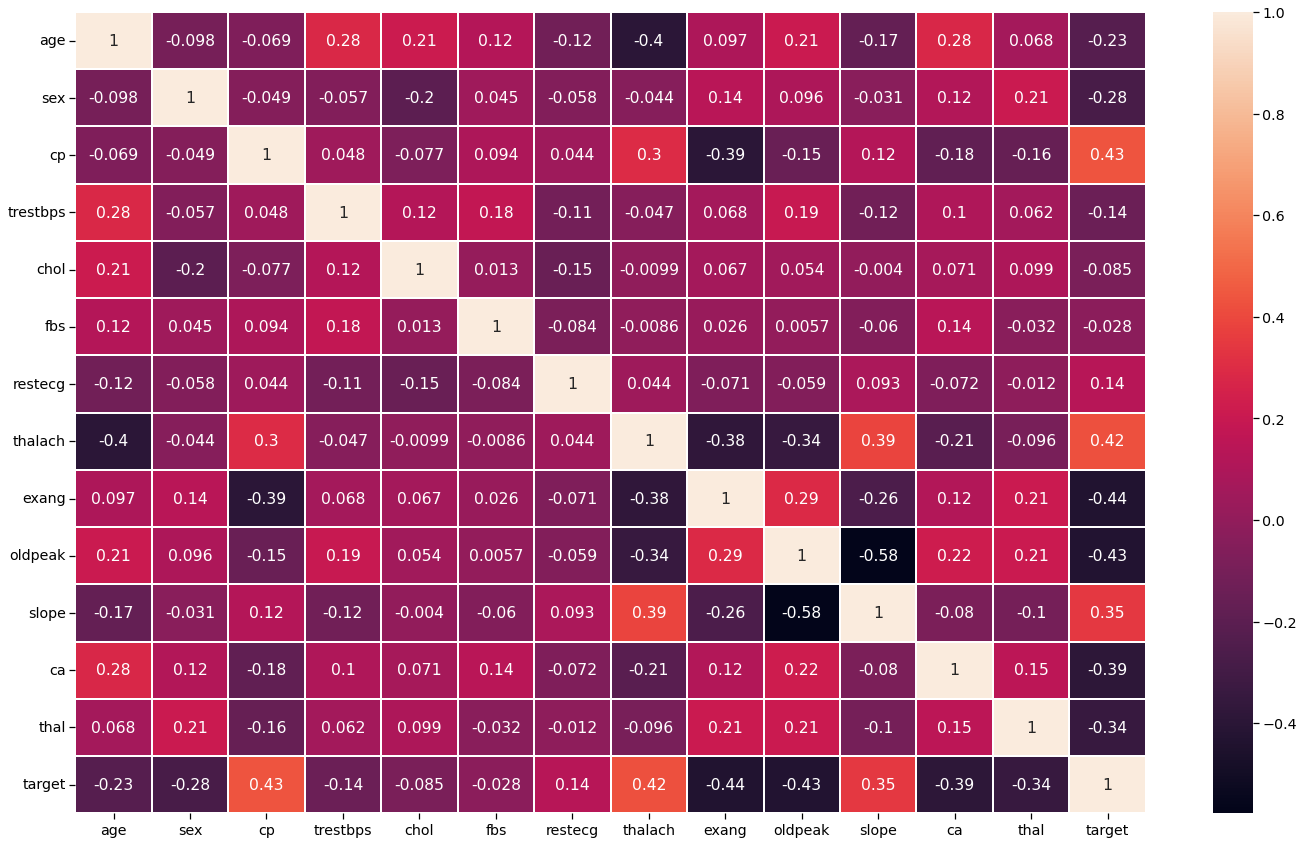

In [12]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(data.corr(),annot=True,linewidth =2)
plt.tight_layout()

#### correlation of Target Values

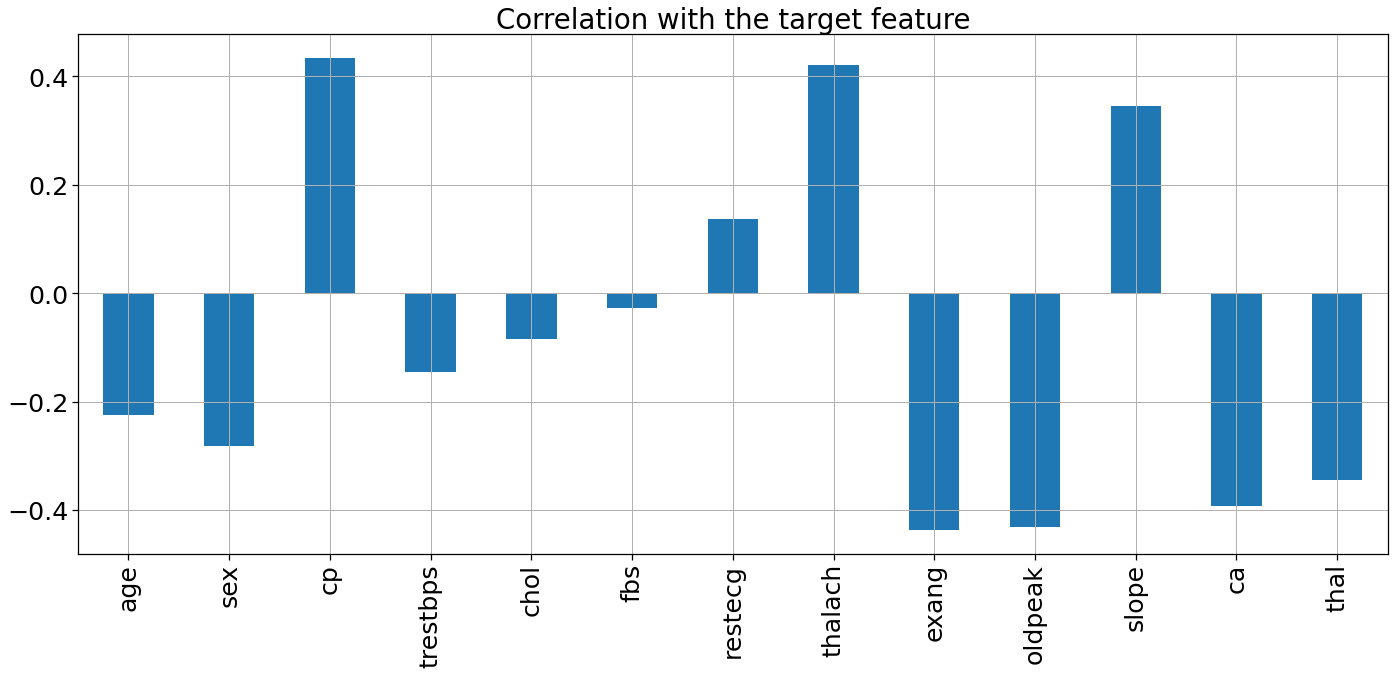

In [13]:
sns.set_context('notebook',font_scale = 2.3)
data.drop('target', axis=1).corrwith(data.target).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

In [67]:
data2 = data.copy()
def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
data2['sex'] = data2['sex'].apply(chng)
def chng2(prob):
    if prob == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'
data2['target'] = data2['target'].apply(chng2)

#### Analysis of age taking 10 samples

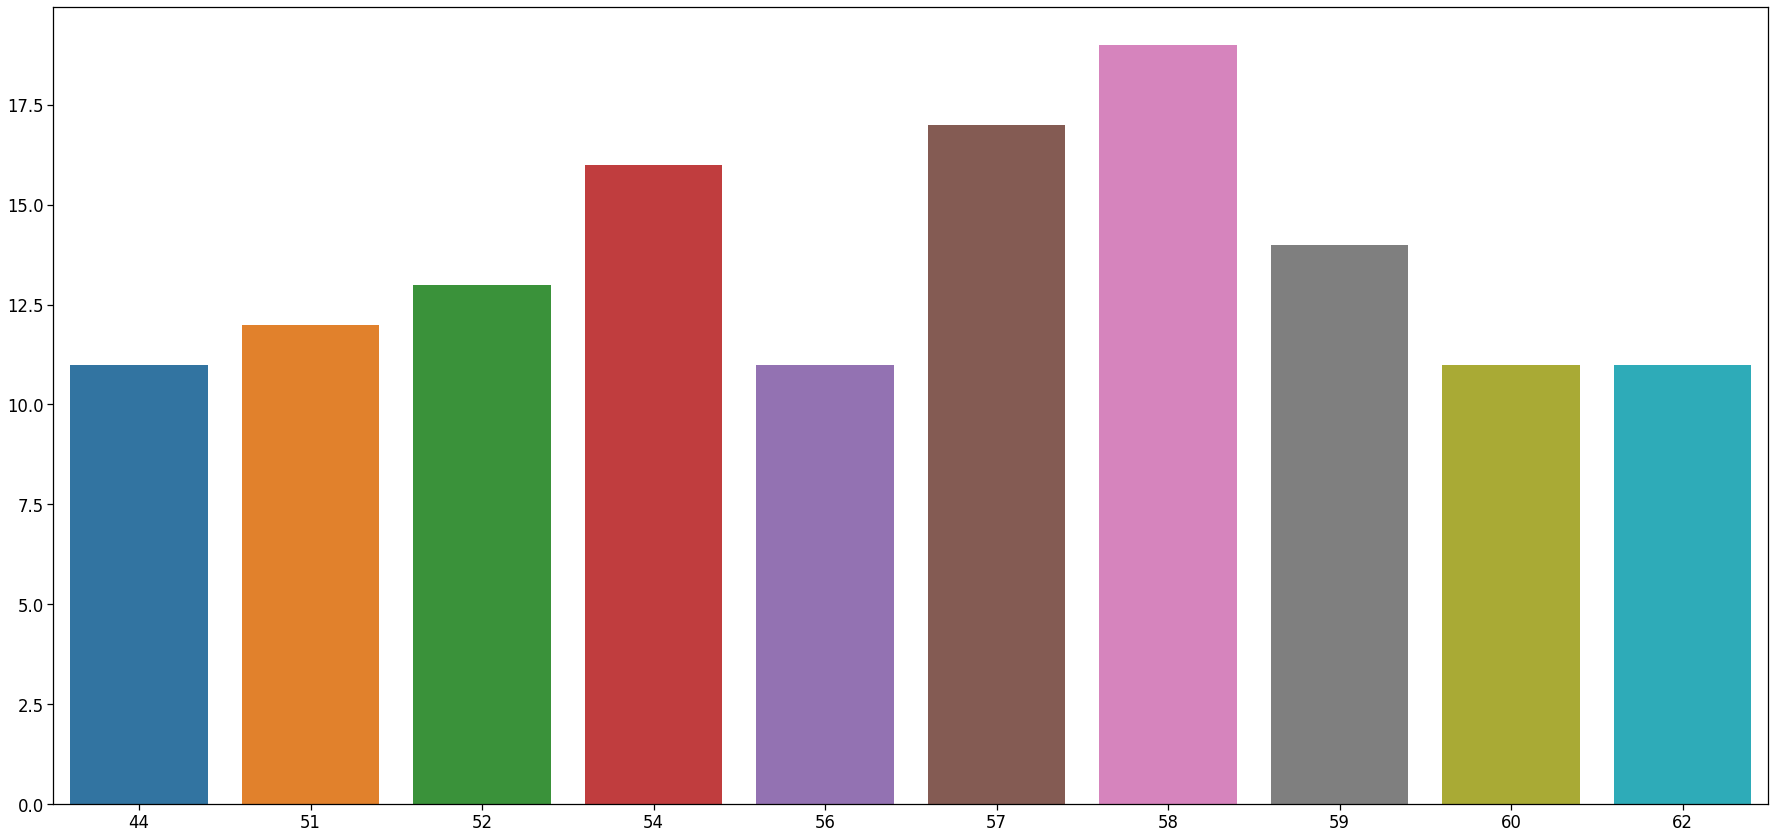

In [68]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=data2.age.value_counts()[:10].index,y=data2.age.value_counts()[:10].values)
plt.tight_layout()

 we can see that the 58 age column has the highest frequency.

#### lets find min and max of ages

In [69]:
minAge=min(data.age)
maxAge=max(data.age)
meanAge=data.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


 #### Age feature into three parts – “Young”, “Middle” and “Elder”

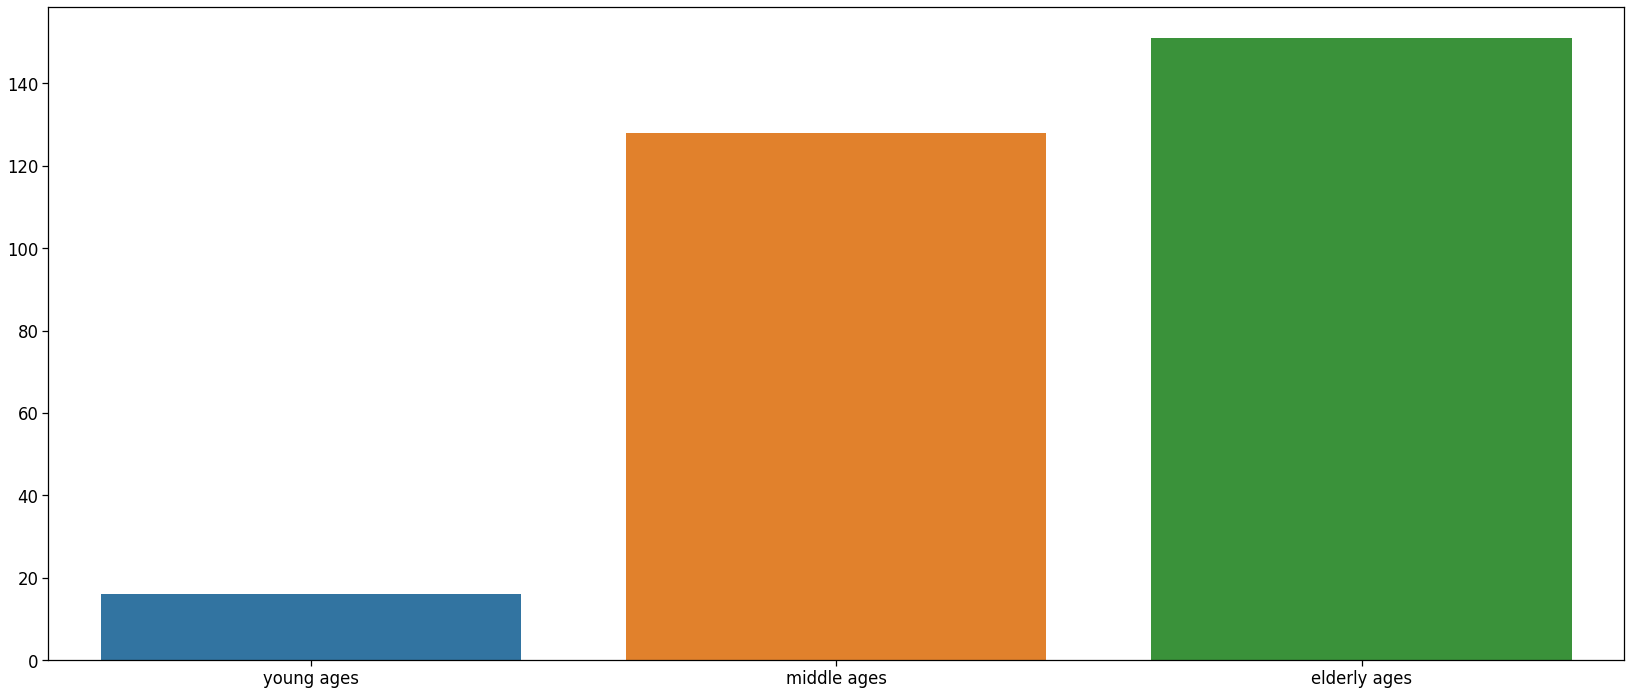

In [70]:
Young = data[(data.age>=29)&(data.age<40)]
Middle = data[(data.age>=40)&(data.age<55)]
Elder = data[(data.age>55)]

plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

 Elder people are the most affected by heart disease and young ones are the least affected.

 ### lets see in pie chart

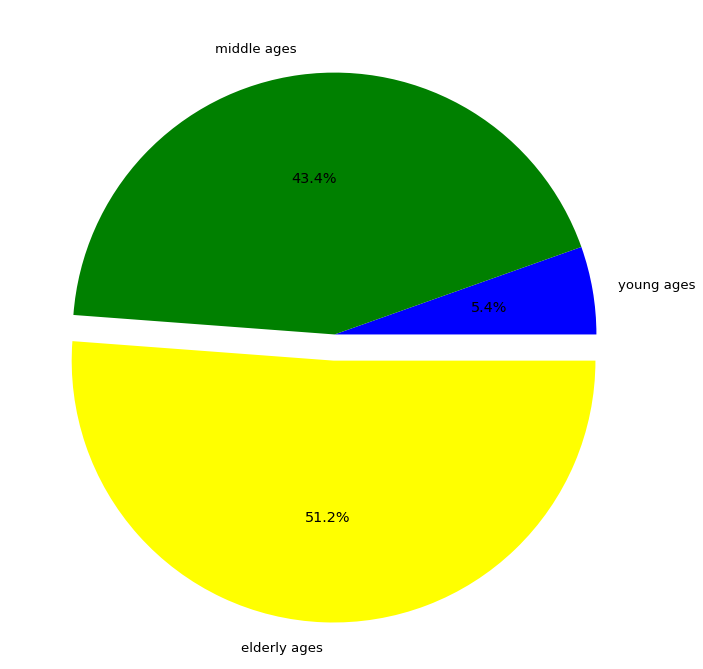

In [71]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

### Feature analyis by gender

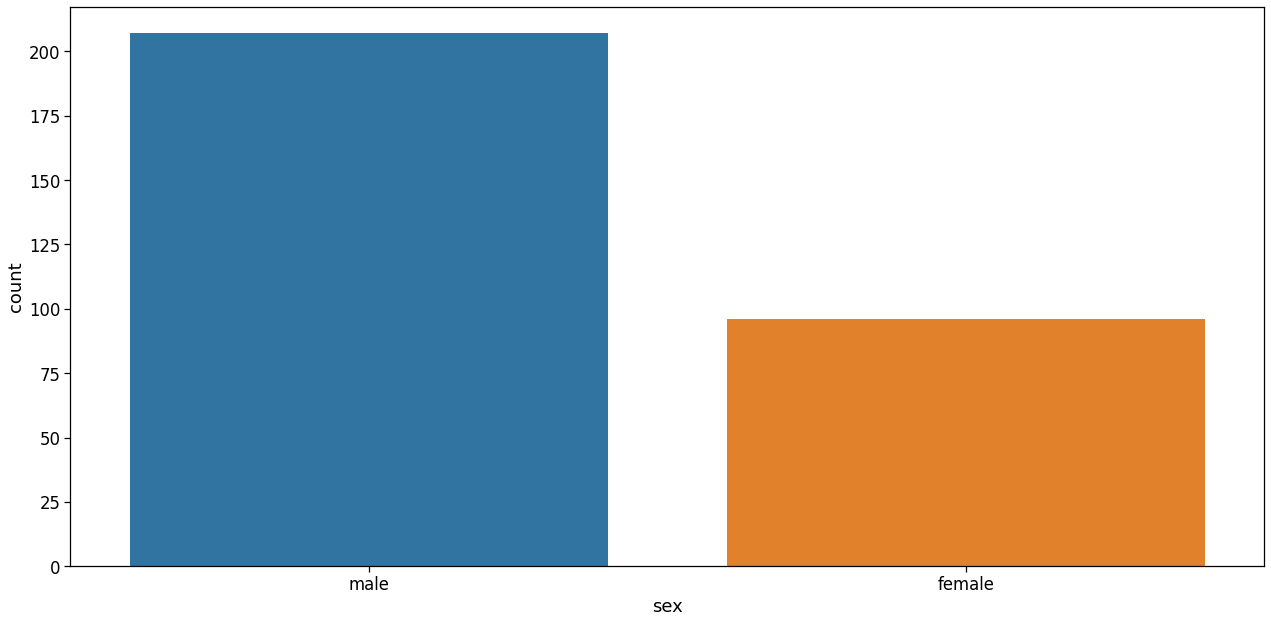

In [64]:
x1=18
y1=9
z1=1.5
plt.figure(figsize=(x1,y1))
sns.set_context('notebook',font_scale = z1)
sns.countplot(data = data2,x='sex')
plt.tight_layout()

### Here it is clearly visible that, Ratio of Male to Female is approx 2:1.

Text(0.5, 1.0, 'Gender v/s target')

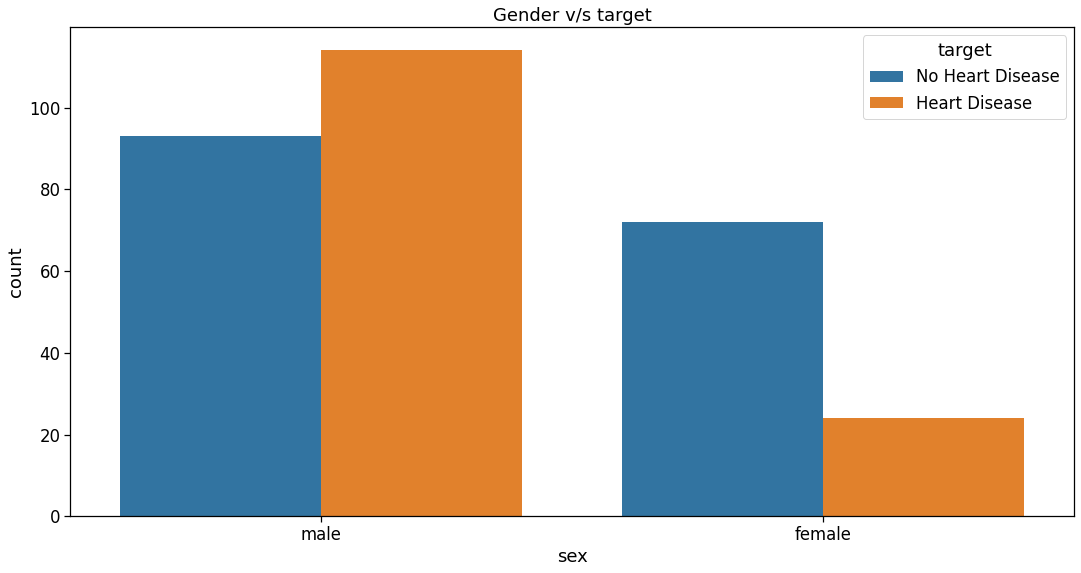

In [63]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data= data2, x='sex',hue='target')
plt.title('Gender v/s target')

### Chest Pain(CP) Analysis

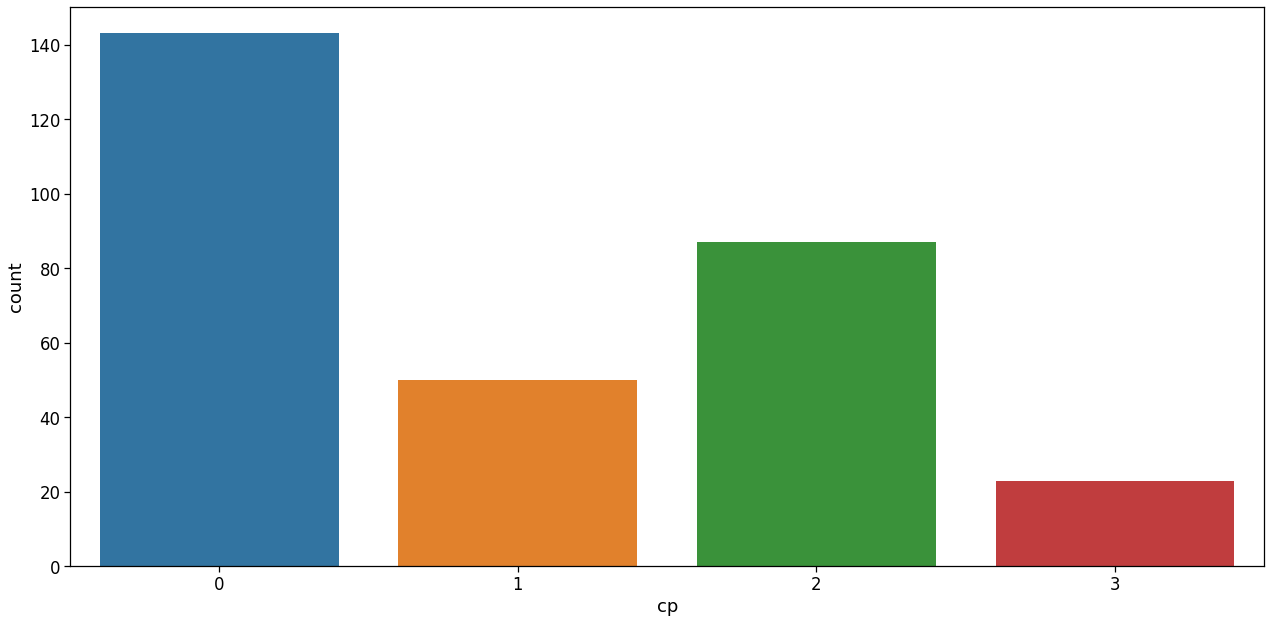

In [72]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data=data2,x='cp')
plt.tight_layout()

### there are 4 types of chest pain
1. status at least
2. condition slightly distressed
3. condition medium problem
4. condition too bad

### Thal Analysis


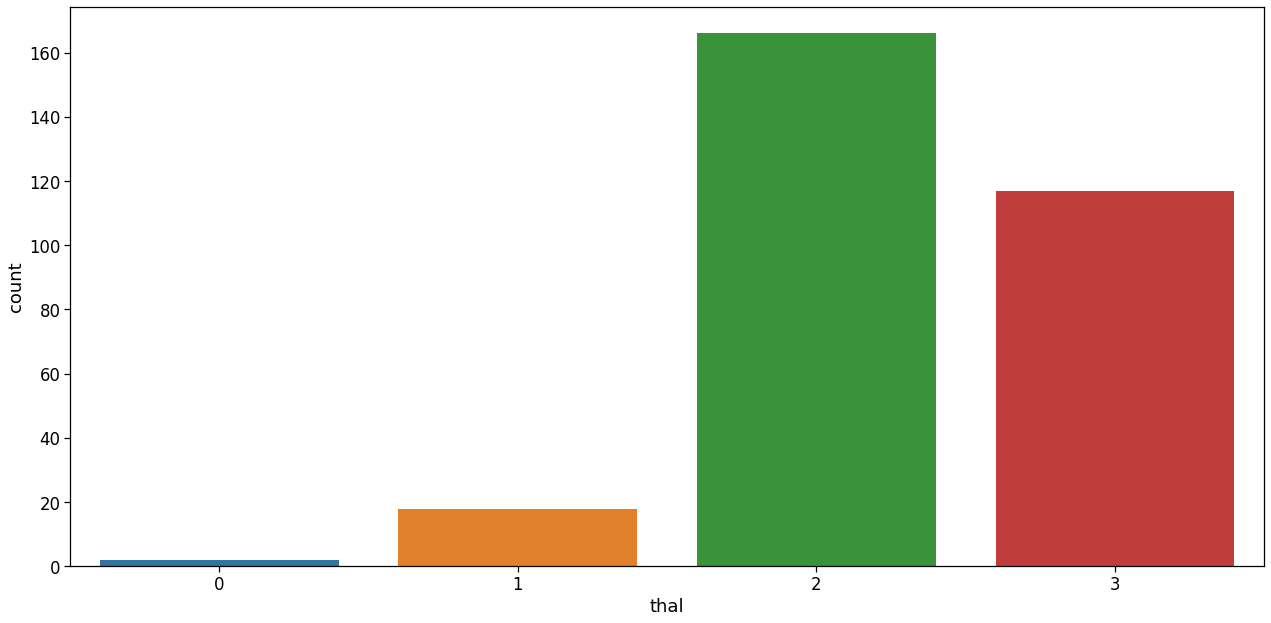

In [75]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data=data,x='thal')
plt.tight_layout()

### Target Analysis

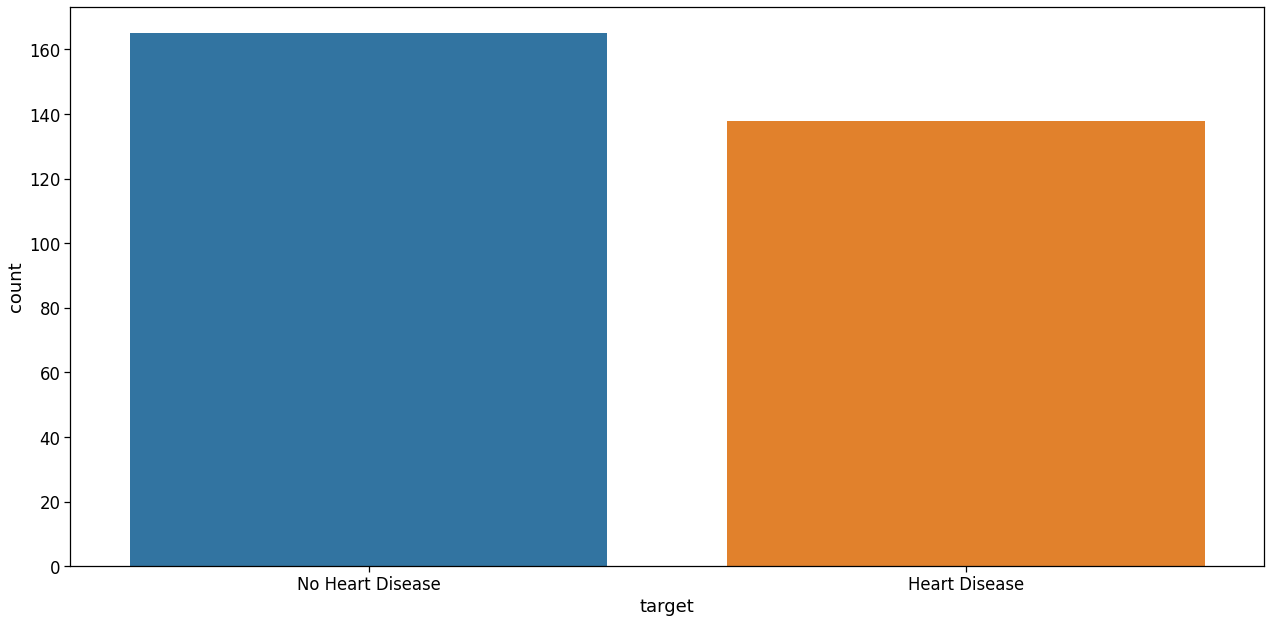

In [76]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data=data2,x='target')
plt.tight_layout()

### Analyzing cp vs target column

Text(0.5, 1.0, 'Chest Pain Type v/s targe')

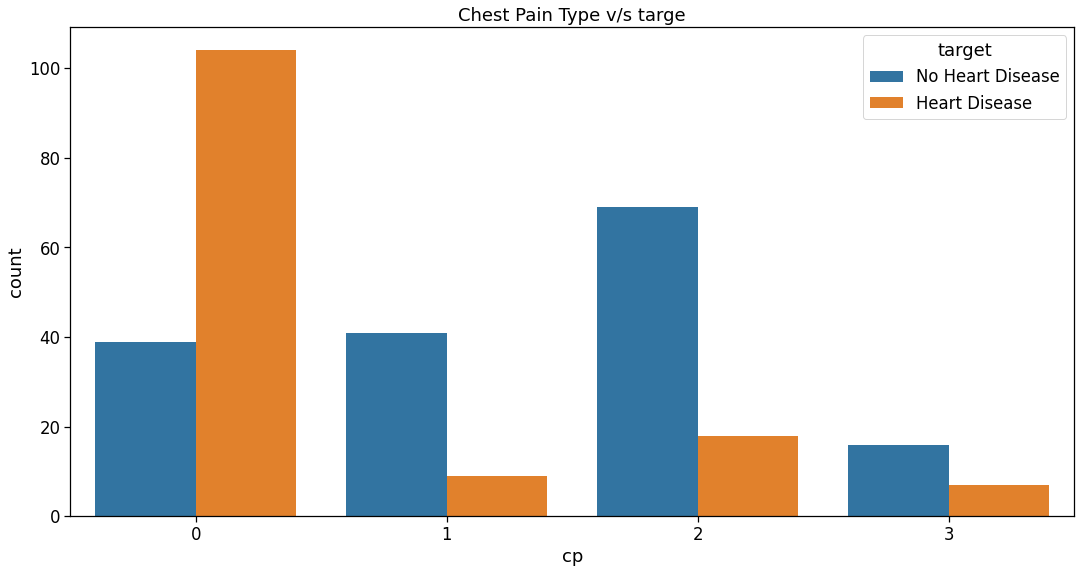

In [78]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data= data2, x='cp',hue='target')
plt.title('Chest Pain Type v/s targe')

* People having the least chest pain are not likely to have heart disease
* People having severe chest pain are likely to have heart disease.

Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen


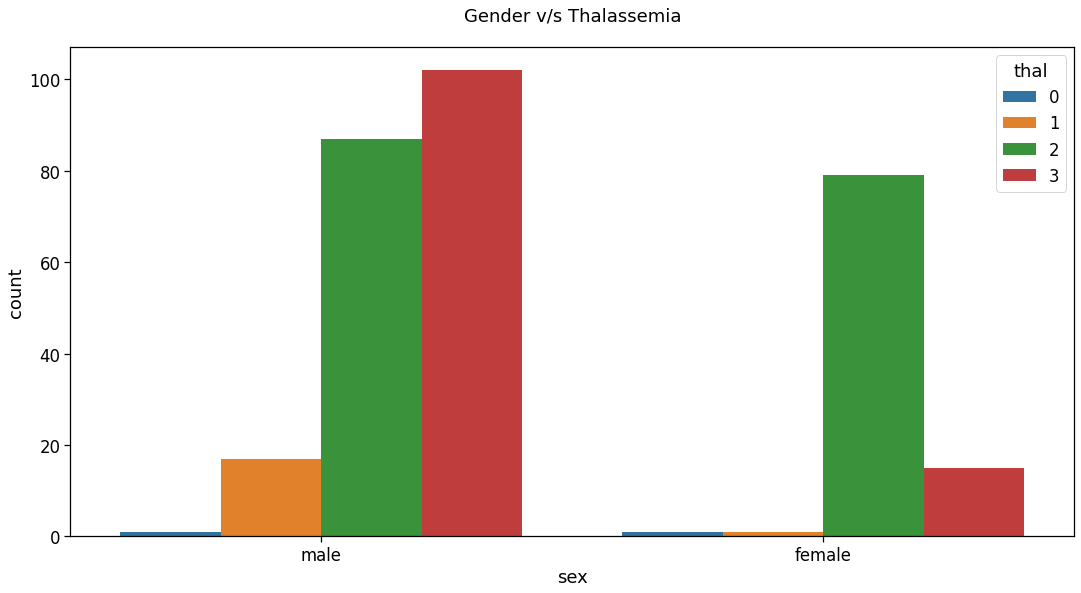

In [86]:
plt.figure(figsize=(18,9))
sns.countplot(data= data2, x='sex',hue='thal')
plt.title('Gender v/s Thalassemia\n')
print('Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen')

<AxesSubplot:xlabel='target', ylabel='age'>

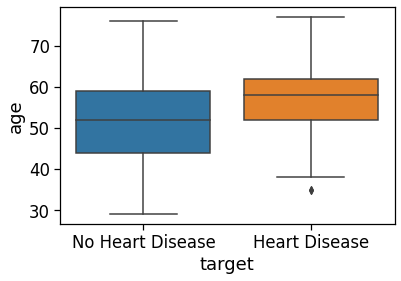

In [87]:
sns.boxplot(data=data2,x='target',y='age')

<AxesSubplot:xlabel='ca', ylabel='age'>

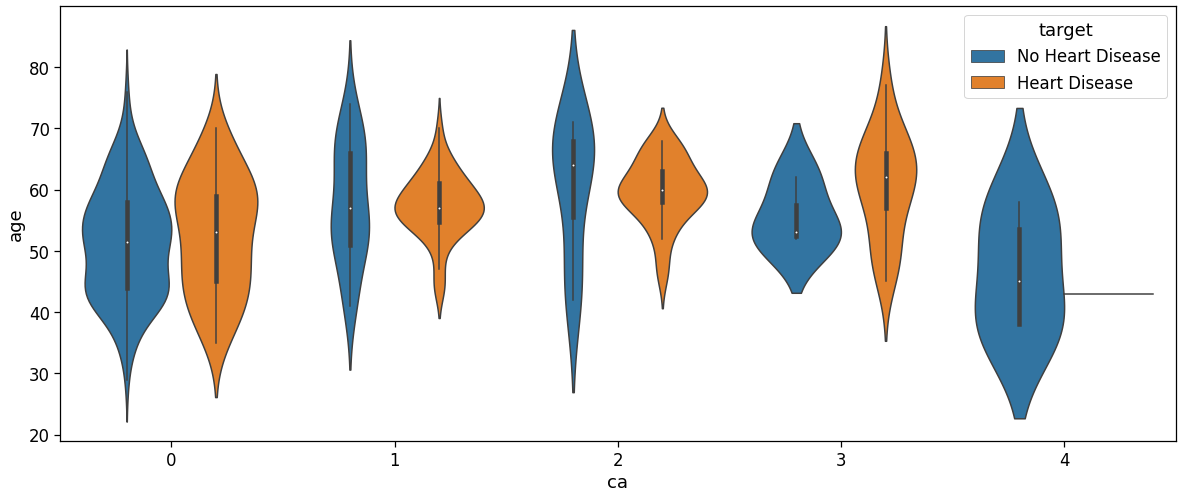

In [90]:
plt.figure(figsize=(20,8))
sns.violinplot(data=data2,x='ca',y='age',hue='target')

<AxesSubplot:xlabel='cp', ylabel='thalach'>

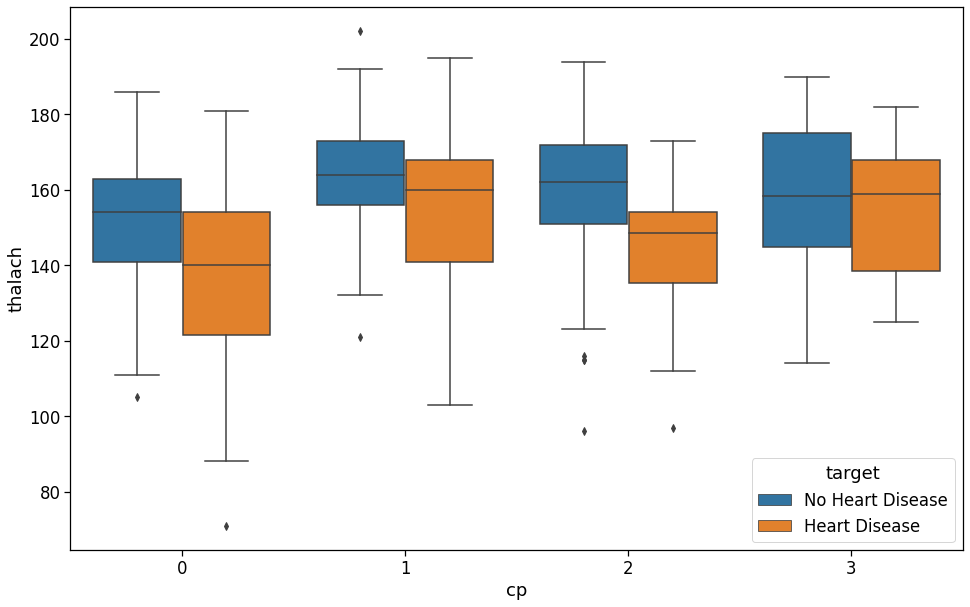

In [94]:
plt.figure(figsize=(16,10))
sns.boxplot(data=data2,x='cp',y='thalach',hue='target')

<AxesSubplot:xlabel='fbs', ylabel='trestbps'>

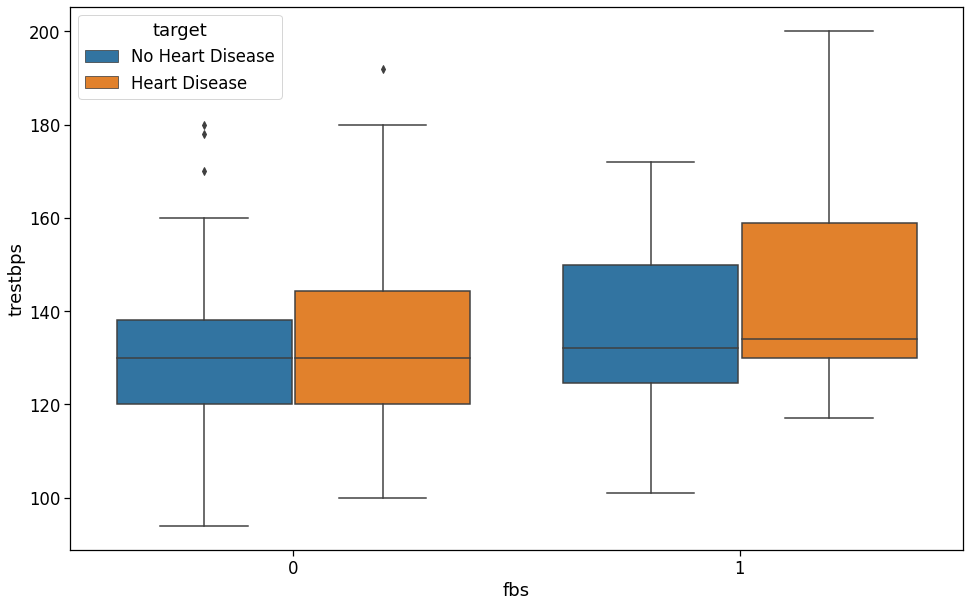

In [102]:
plt.figure(figsize=(16,10))
sns.boxplot(data=data2,x='fbs',y='trestbps',hue='target')

<AxesSubplot:xlabel='exang', ylabel='oldpeak'>

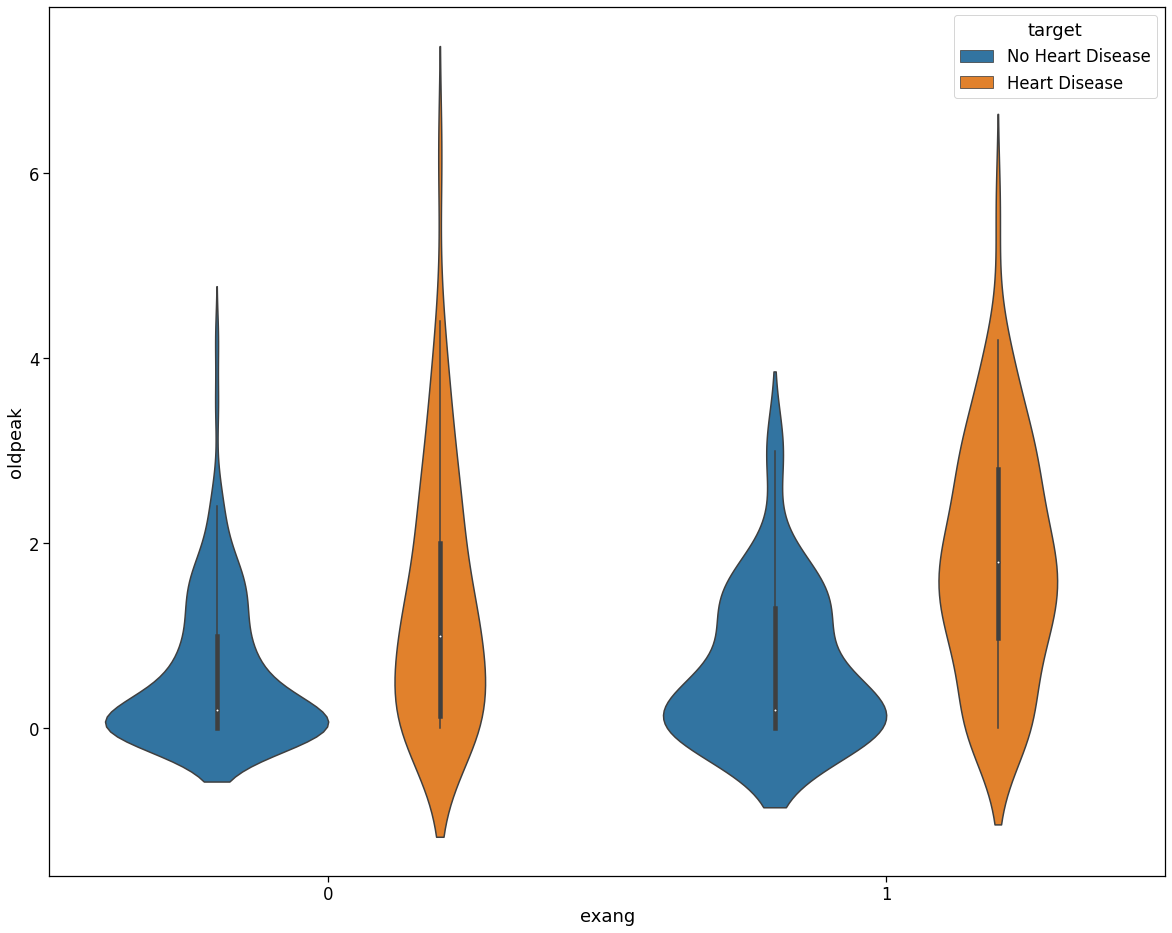

In [109]:
plt.figure(figsize=(20,16))
sns.violinplot(data=data2,x='exang',y='oldpeak',hue='target')

<AxesSubplot:xlabel='target', ylabel='thalach'>

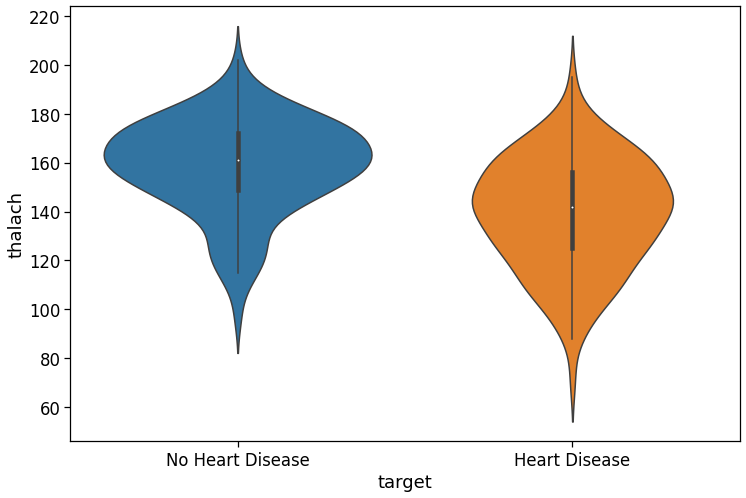

In [111]:
plt.figure(figsize=(12,8))
sns.violinplot(data=data2,x='target',y='thalach')

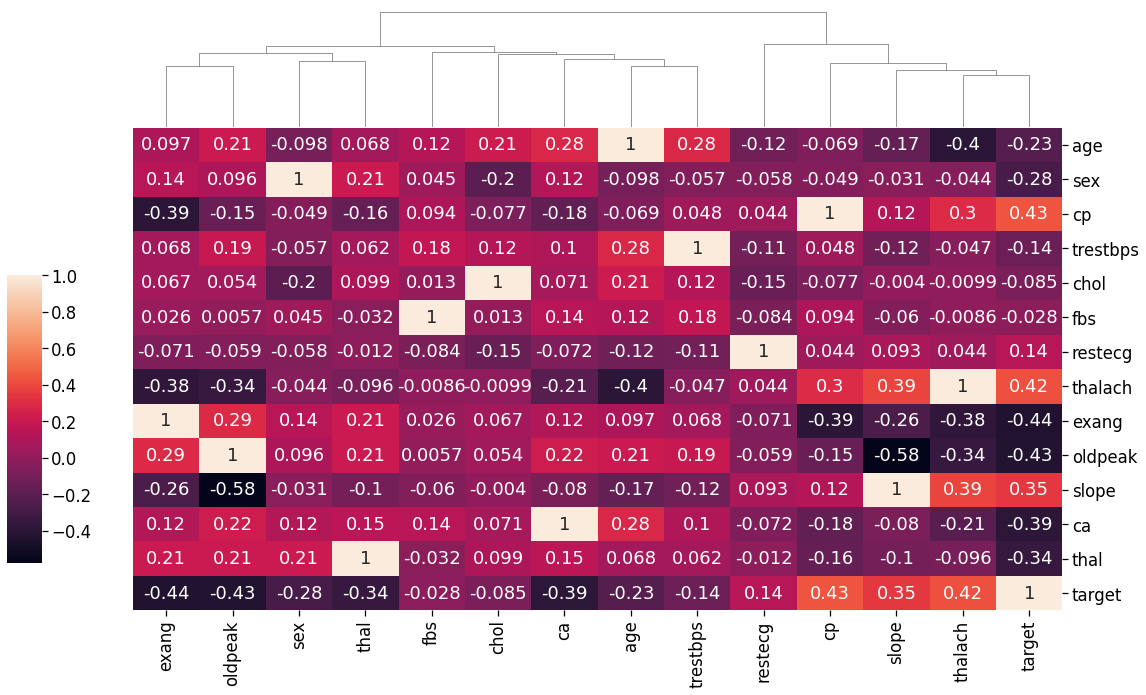

In [129]:

sns.clustermap(data.corr(),annot=True,figsize=(16, 10),row_cluster=False,dendrogram_ratio=(.1, .2),cbar_pos=(0, .2, .03, .4))

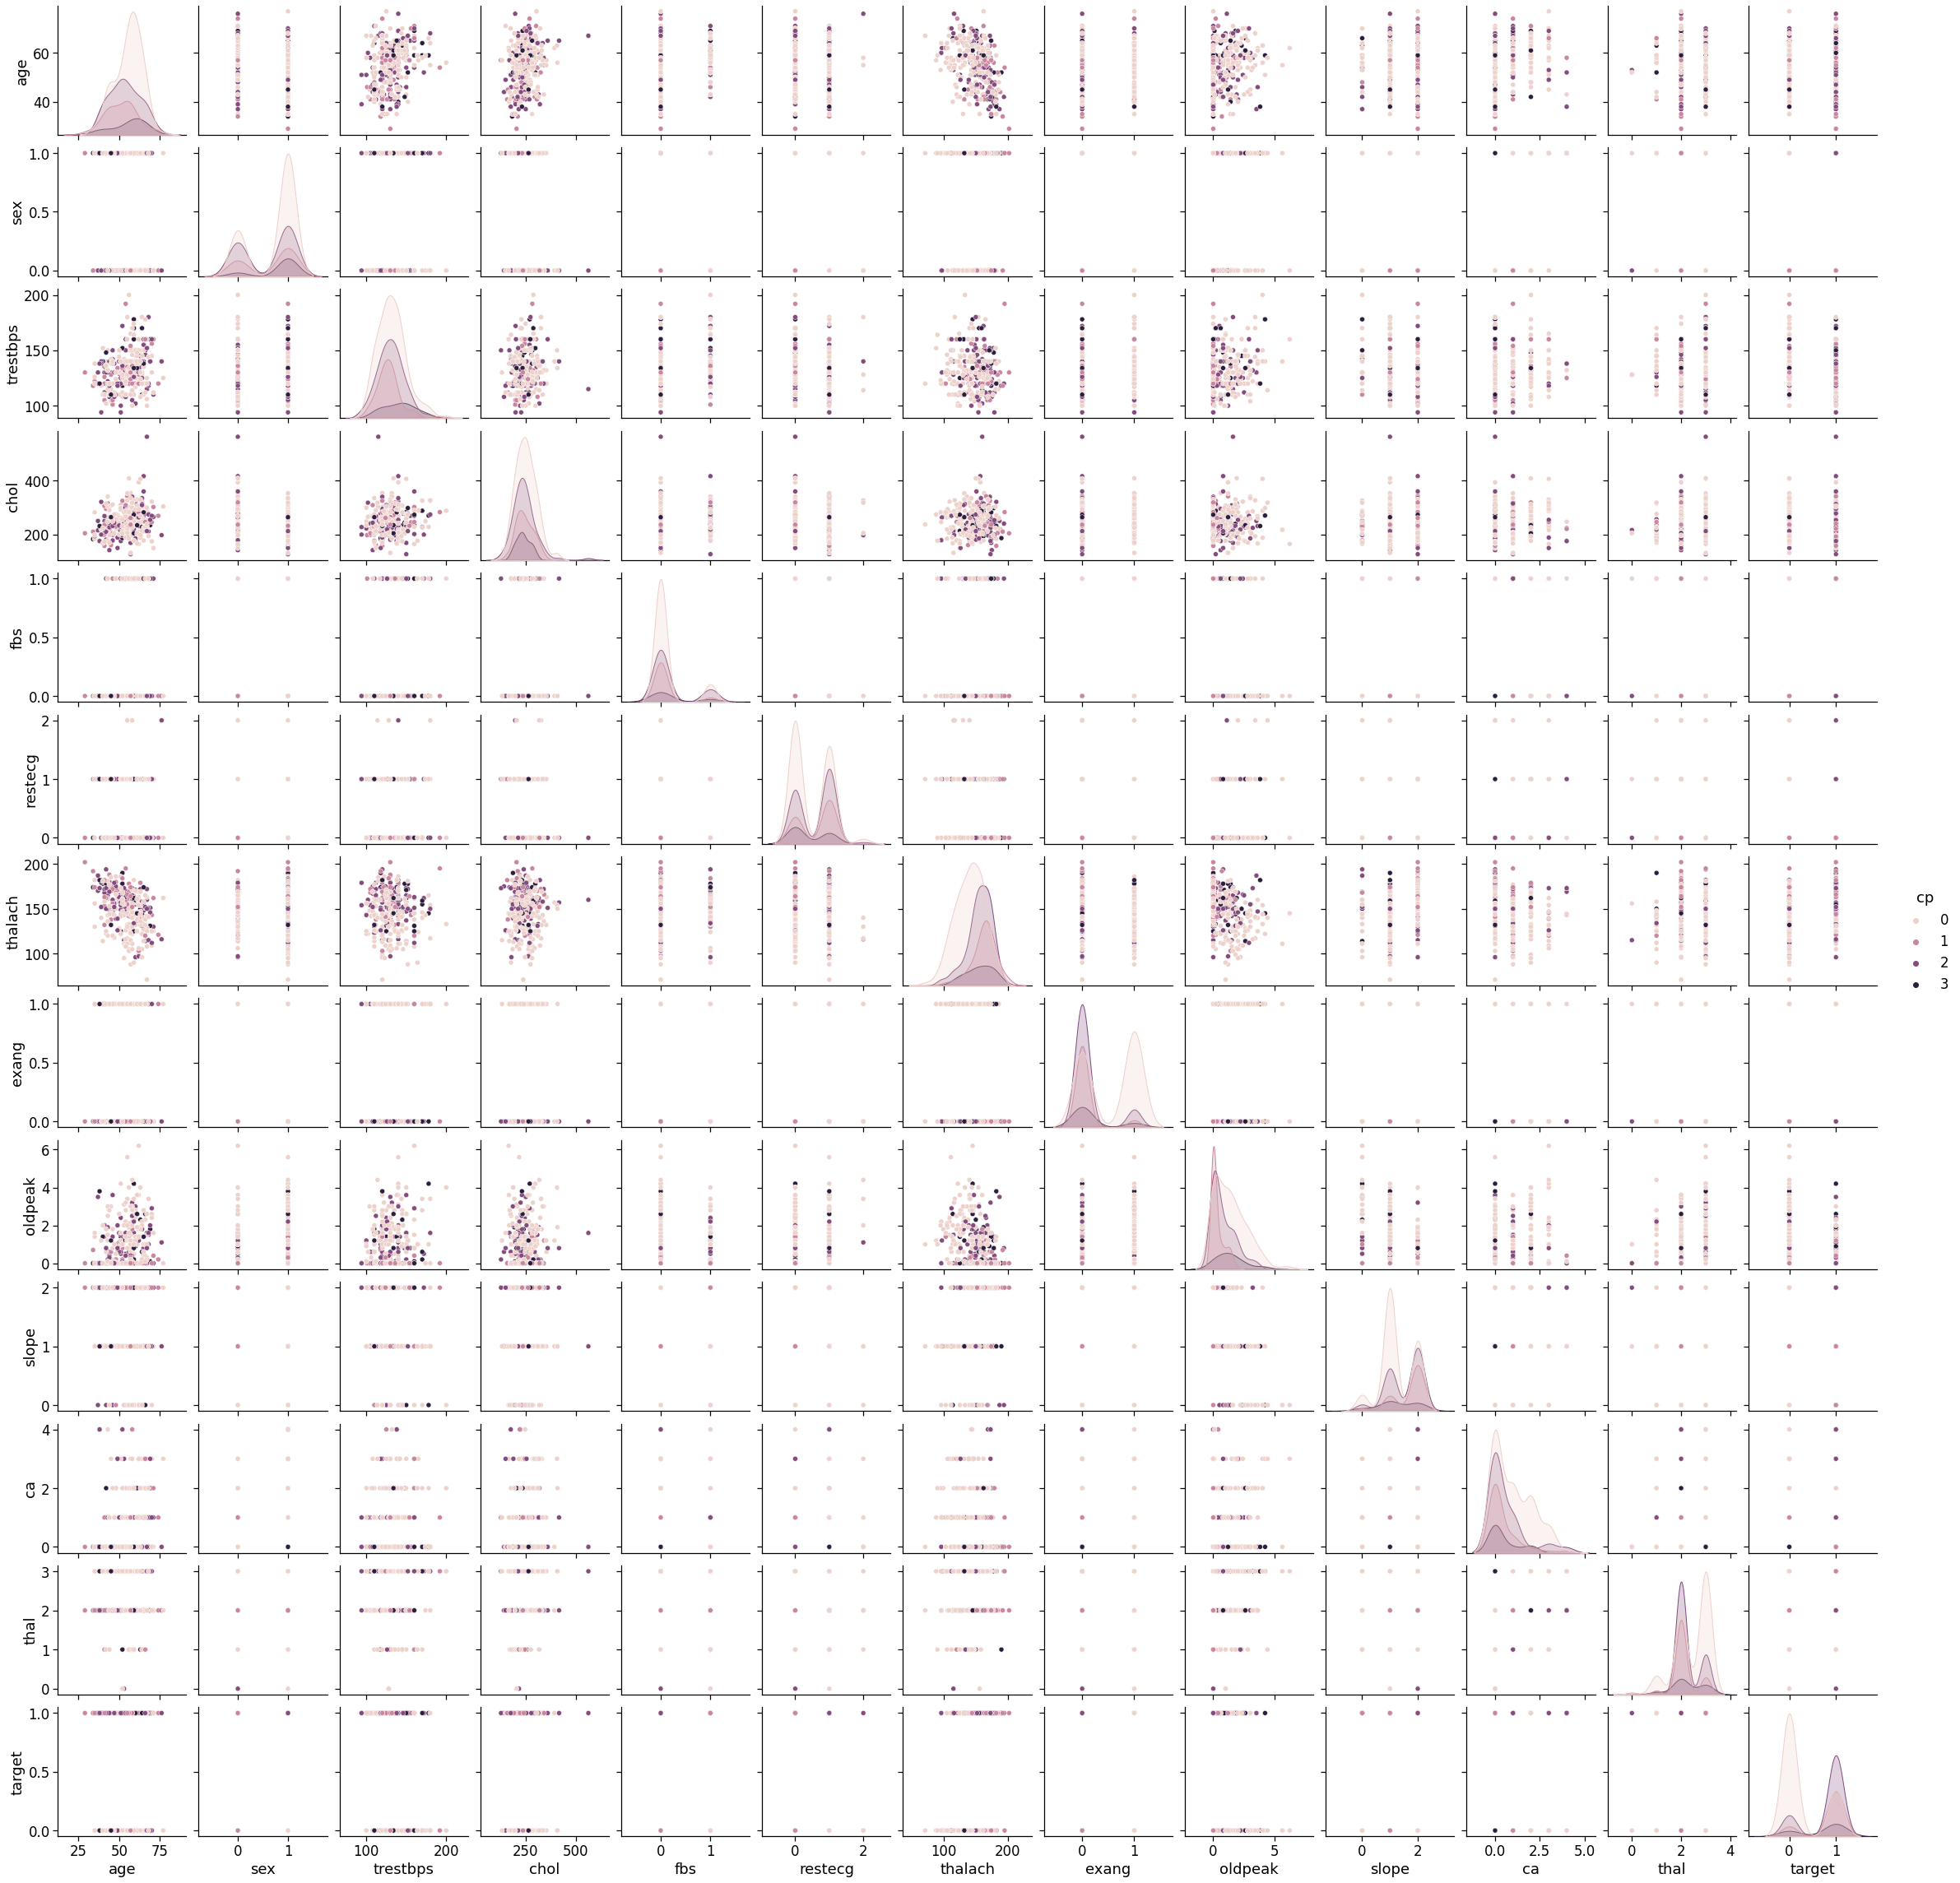

In [131]:
sns.pairplot(data,hue='cp')

#### Feature Engineering
#### Now we will see the complete description of the continuous data as well as the categorical data

In [26]:
categorical_val = []
continous_val = []
for column in data.columns:
    print("--------------------")
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

--------------------
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
--------------------
sex : [1 0]
--------------------
cp : [3 2 1 0]
--------------------
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
--------------------
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 34

#####  first we will be removing the target column from our set of features then we will categorize all the categorical variables using the get dummies method which will create a separate column for each category suppose X variable contains 2 types of unique values then it will create 2 different columns for the X variable.

In [81]:
categorical_val.remove('target')
dfs = pd.get_dummies(data, columns = categorical_val)
dfs.head(6)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
5,57,140,192,148,0.4,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0


##### we will be using the standard scaler method to scale down the data so that it won’t raise the outliers also dataset which is scaled to general units leads to having better accuracy.

In [28]:
sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dfs[col_to_scale] = sc.fit_transform(dfs[col_to_scale])
dfs.head(6)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
5,0.290464,0.478391,-1.048678,-0.072018,-0.551783,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0


## Modeling
### Splitting our Dataset

In [29]:
X = dfs.drop('target', axis=1)
y = dfs.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### KNN Machine Learning Algorithm

In [30]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)
print(accuracy_score(y_test,y_pred1))

0.8571428571428571


### LogisticRegression Machine Learning Algorithm

In [31]:
from sklearn.linear_model import LogisticRegression
np.random.seed(41)
lr = LogisticRegression().fit(X_train, y_train)
lr.score(X_test, y_test)

0.8571428571428571

#### RandomForestClassifier Machine Learning Algorithm

In [35]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(41)
rf = RandomForestClassifier().fit(X_train, y_train)
rf.score(X_test, y_test)

0.8461538461538461

### KNN and LogisticRegression Machine Learning Algorithms are best fitting algorithms